In [42]:
import numpy as np
import matplotlib.pyplot as plot
import scipy as scp
from scipy import optimize
from scipy import stats
font = {'family' : 'normal',
        'size'   : 20}

plot.rc('font', **font)

# Bestimmung von h/e

### Gegenspannung

In [57]:
x_values = [819,740,688,549,519] #frequenzen *10^12
x_errors = [7,7,7,7,7]

y_values = [1.69,1.40,1.22,0.73,0.65] #Stopspannungen
y_errors = [0.01,0.01,0.01,0.01,0.01]

In [58]:
x_min = 475
x_max = 850

y_min = 0.5
y_max = 1.8

U = h/e * f - W/e
=> y-achsenabschnitt = W/e
=> Geradensteigung = h/e

In [59]:
def fit_func(x,a,b):
    return a*x + b

param,errors = optimize.curve_fit(fit_func, x_values, y_values,sigma=y_errors)
print("a:{0} \nb:{1}".format(param[0],param[1]))
print(np.sqrt(errors))

a:0.0034836433403624477 
b:-1.1716555346603028
[[4.77599591e-05            nan]
 [           nan 3.21269925e-02]]
<ipython-input-59-67e2f0743fd2>:6: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(errors))


In [60]:
def f(x):
    return param[0]*x+param[1]

xf_values = np.arange(x_min, x_max, (x_max-x_min)/100)
yf_values = []
for x in xf_values:
    yf_values.append(f(x))

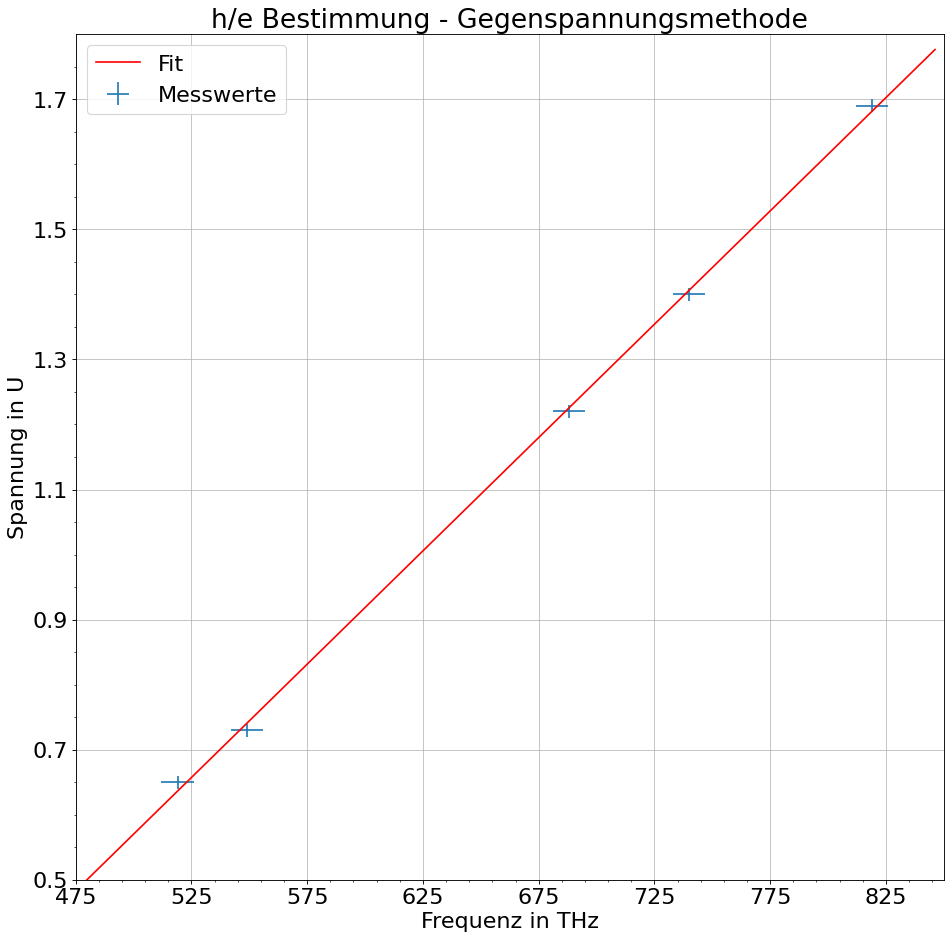

In [61]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=80)

ax=axs
#Settings
ax.set_title('h/e Bestimmung - Gegenspannungsmethode')

ax.errorbar(x_values,y_values,y_errors,x_errors,marker=" ",linestyle=" ", label="Messwerte")
ax.plot(xf_values,yf_values, label="Fit", color="red")
ax.set_xlabel("Frequenz in THz")
ax.set_ylabel("Spannung in U")

#Grid Setting
major_ticks = np.arange(x_min, x_max, 50)
minor_ticks = np.arange(x_min, x_max, 10)
major_ticks_y = np.arange(y_min, y_max, 0.2)
minor_ticks_y = np.arange(y_min, y_max, 0.05)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

ax.grid(which='minor', alpha=0.55)
ax.grid(which='major', alpha=0.8)

ax.grid(which='both')
plot.grid()
plot.legend()
plot.savefig('he_gegenspannung.png')

### Direkte Messung

In [62]:
x_values = [819,740,688,549,519] #frequenzen
x_errors = [7,7,7,7,7]

y_values = [1.68,1.39,1.18,0.71,0.65] #Stopspannungen
y_errors = [0.01,0.01,0.01,0.01,0.01]

In [63]:
x_min = 475
x_max = 850

y_min = 0.5
y_max = 1.8

In [66]:
def fit_func(x,a,b):
    return a*x + b

param,errors = optimize.curve_fit(fit_func, x_values, y_values,sigma=y_errors)
print("a:{0} \nb:{1}".format(param[0],param[1]))
print(np.sqrt(errors))

a:0.003467395002589086 
b:-1.1768828867165642
[[0.00010508        nan]
 [       nan 0.07068764]]
<ipython-input-66-67e2f0743fd2>:6: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(errors))


In [67]:
def f(x):
    return param[0]*x+param[1]

xf_values = np.arange(x_min, x_max, (x_max-x_min)/100)
yf_values = []
for x in xf_values:
    yf_values.append(f(x))

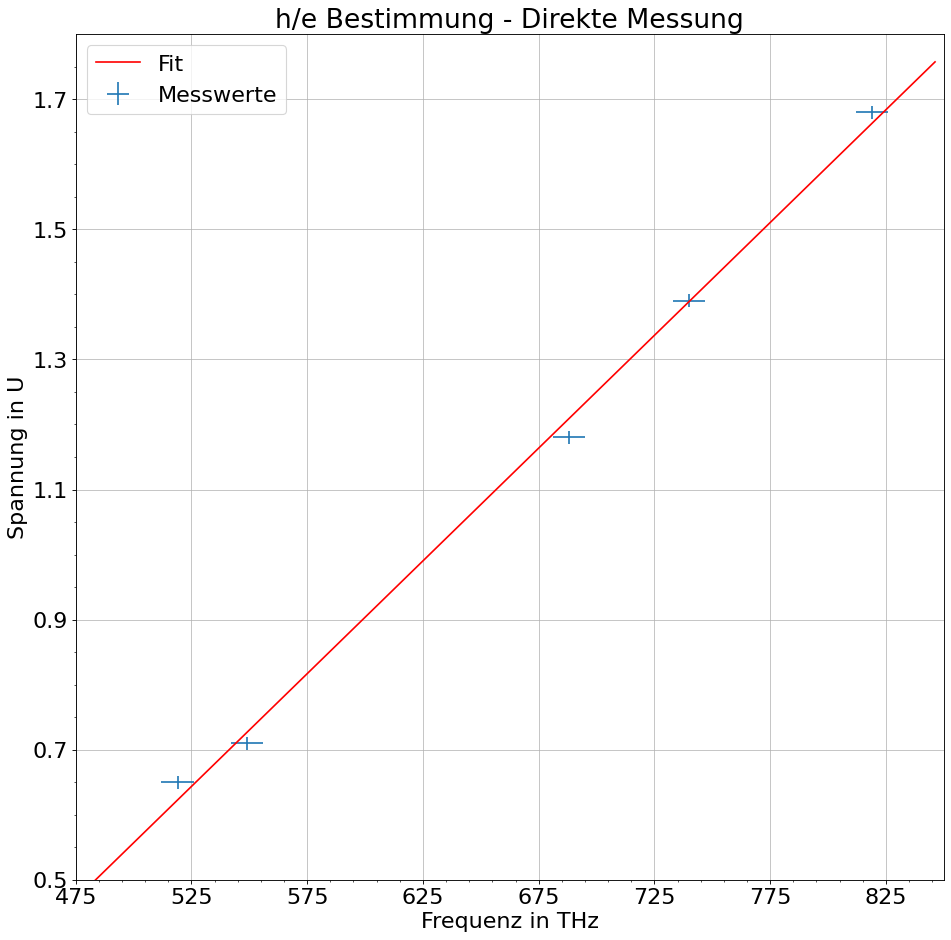

In [68]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=80)

ax=axs
#Settings
ax.set_title('h/e Bestimmung - Direkte Messung')

ax.errorbar(x_values,y_values,y_errors,x_errors,marker=" ",linestyle=" ", label="Messwerte")
ax.plot(xf_values,yf_values, label="Fit", color="red")
ax.set_xlabel("Frequenz in THz")
ax.set_ylabel("Spannung in U")

#Grid Setting
major_ticks = np.arange(x_min, x_max, 50)
minor_ticks = np.arange(x_min, x_max, 10)
major_ticks_y = np.arange(y_min, y_max, 0.2)
minor_ticks_y = np.arange(y_min, y_max, 0.05)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

ax.grid(which='minor', alpha=0.55)
ax.grid(which='major', alpha=0.8)


ax.grid(which='both')
plot.grid()
plot.legend()
plot.savefig('he_direkt.png')

# Intensität und Photonenstrom

In [69]:
x_values_b = [68,48,33,28,20,14] #Transmissionsgrad
x_errors_b = [1,1,1,1,1,1]

y_values_b = [9.6,6.4,4.9,4.1,2.7,2.1] #Photonenstrom
y_errors_b = [0.1,0.1,0.1,0.1,0.1,0.1]

x_values_r = [67,46,31,23,16,11] #Transmissionsgrad
x_errors_r = [1,1,1,1,1,1]

y_values_r = [3.2,2.2,1.5,1.1,0.8,0.5] #Photonenstrom
y_errors_r = [0.1,0.1,0.1,0.1,0.1,0.1]

In [70]:
x_min = 5
x_max = 75

y_min = 0
y_max = 10

In [71]:
def fit_func(x,a,b):
    return a*x + b

param_b,errors_b = optimize.curve_fit(fit_func, x_values_b, y_values_b,sigma=y_errors_b)
param_r,errors_r = optimize.curve_fit(fit_func, x_values_r, y_values_r,sigma=y_errors_r)
print("a:{0} \nb:{1}".format(param[0],param[1]))

a:0.003467395002589086 
b:-1.1768828867165642


In [72]:
def f_b(x):
    return param_b[0]*x+param_b[1]
def f_r(x):
    return param_r[0]*x+param_r[1]

xf_values = np.arange(x_min, x_max, (x_max-x_min)/100)
yf_values_b = []
yf_values_r = []
for x in xf_values:
    yf_values_b.append(f_b(x))
    yf_values_r.append(f_r(x))

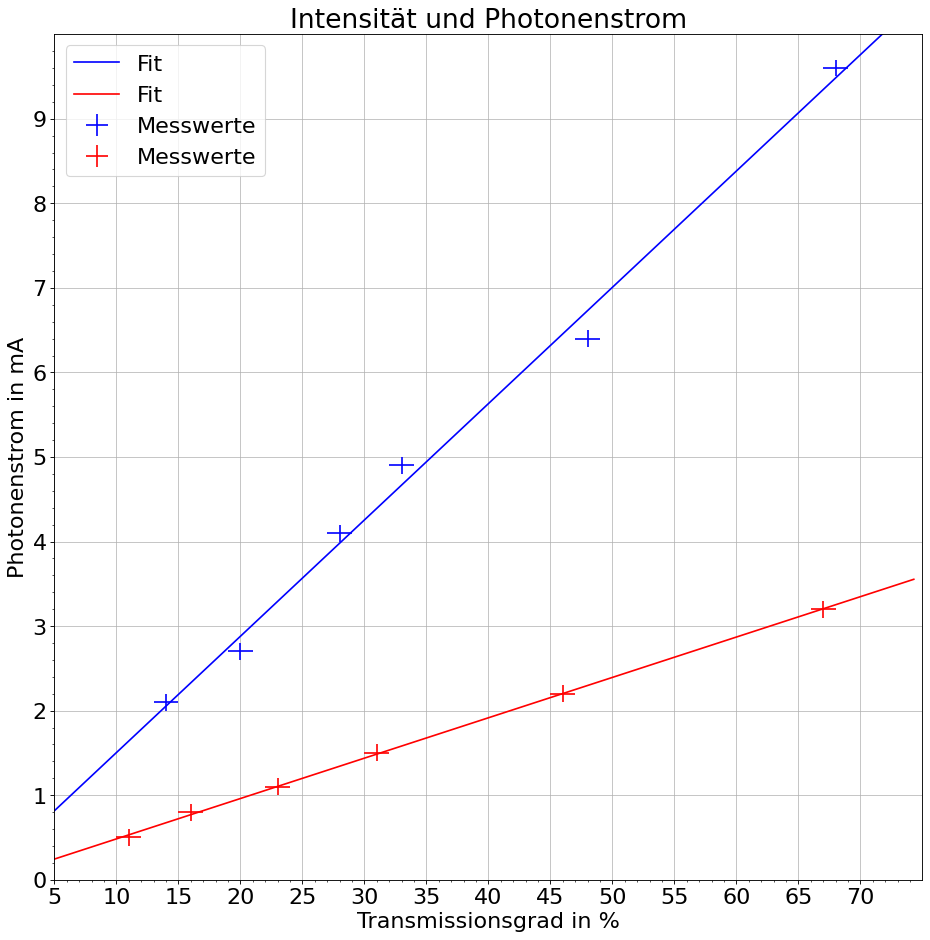

In [73]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=80)

ax=axs
#Settings
ax.set_title('Intensität und Photonenstrom')

ax.errorbar(x_values_b,y_values_b,y_errors_b,x_errors_b,marker=" ",linestyle=" ", label="Messwerte", color="blue")
ax.errorbar(x_values_r,y_values_r,y_errors_r,x_errors_r,marker=" ",linestyle=" ", label="Messwerte", color="red")
ax.plot(xf_values,yf_values_b, label="Fit", color="blue")
ax.plot(xf_values,yf_values_r, label="Fit", color="red")
ax.set_xlabel("Transmissionsgrad in %")
ax.set_ylabel("Photonenstrom in mA")

#Grid Setting
major_ticks = np.arange(x_min, x_max, 5)
minor_ticks = np.arange(x_min, x_max, 1)
major_ticks_y = np.arange(y_min, y_max, 1)
minor_ticks_y = np.arange(y_min, y_max, 0.2)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

ax.grid(which='minor', alpha=0.55)
ax.grid(which='major', alpha=0.8)

ax.grid(which='both')
plot.grid()
plot.legend()
plot.savefig('intensität.png')